In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\moham\\Desktop\\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
# Need to Classify the animal type

X = df.drop(['animal name'], axis=1)
y = df['animal name']

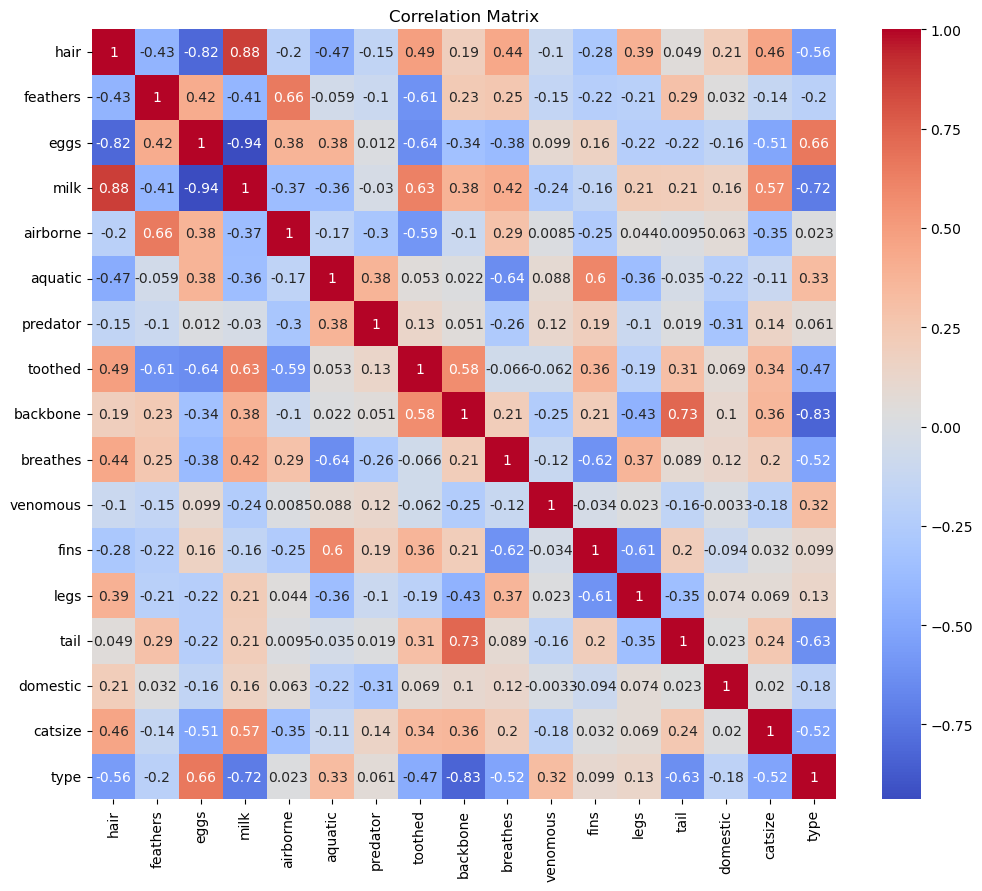

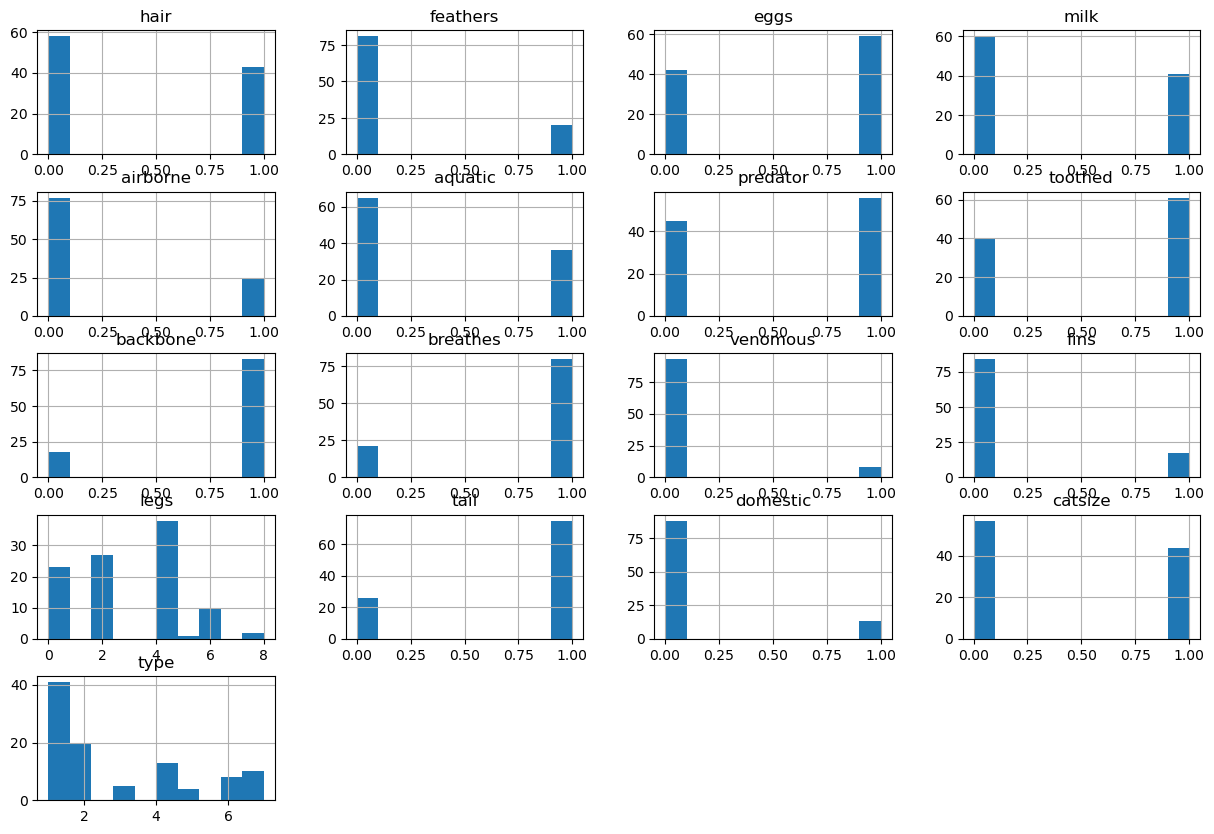

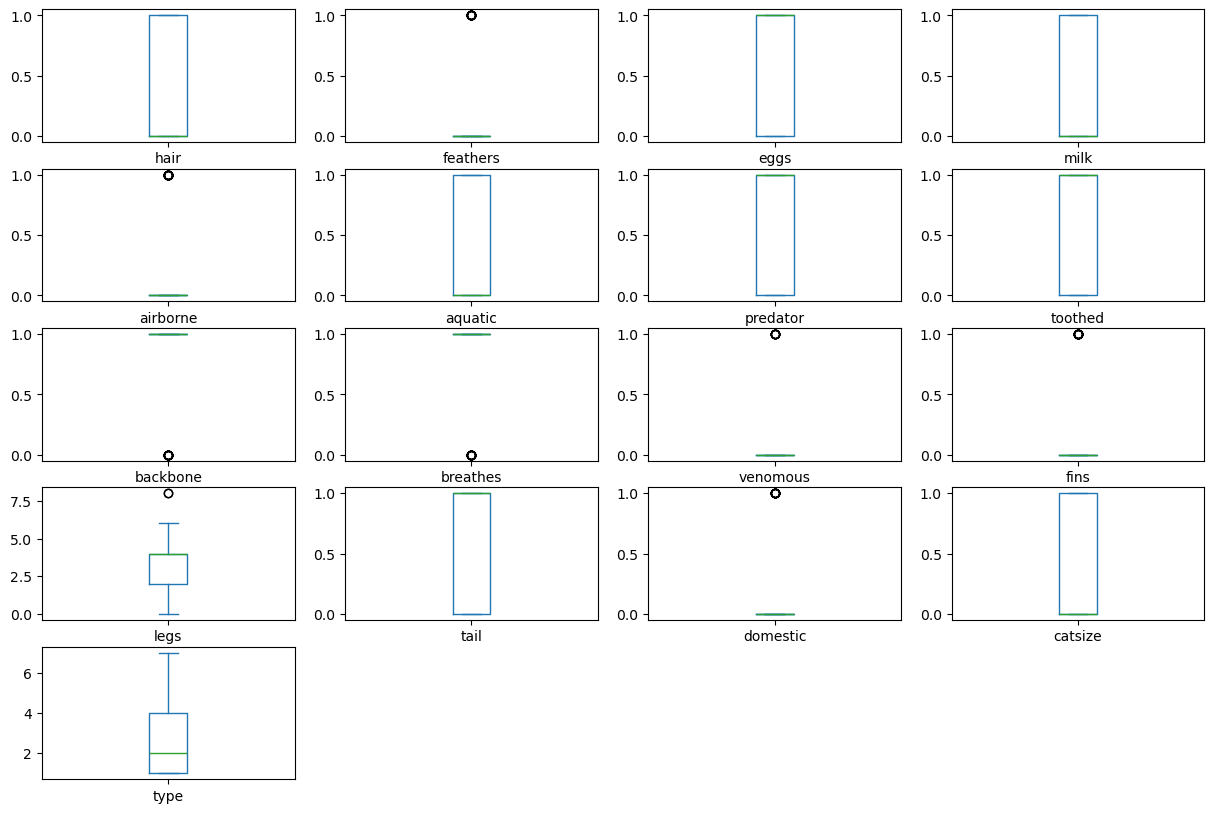

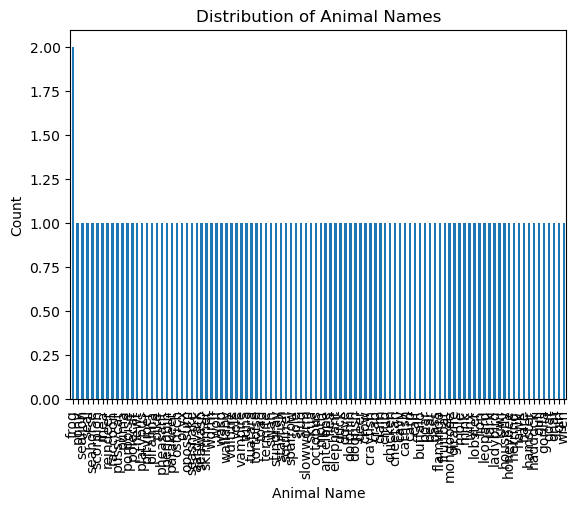

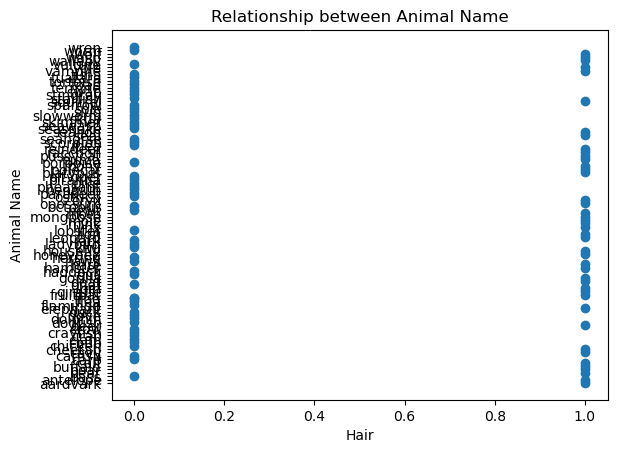

In [3]:
# 1. Analyse the data using the visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix to check for linear relationships between features
correlation_matrix = df.corr(numeric_only=True) # Added numeric_only=True to only include numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Histogram for each feature to understand distribution
df.hist(figsize=(15, 10))
plt.show()

# Boxplot for each feature to identify outliers
df.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 10)) 
plt.show()

# Bar plot to visualize the distribution of the target variable
y.value_counts().plot(kind='bar')
plt.title('Distribution of Animal Names')
plt.xlabel('Animal Name')
plt.ylabel('Count')
plt.show()

# Scatter plot to visualize the relationship between specific features and the target variable
plt.scatter(X['hair'], y) 
plt.title('Relationship between Animal Name')
plt.xlabel('Hair')
plt.ylabel('Animal Name')
plt.show()

In [4]:
# 2 Preprocess the data by handling missing values & Outliers, if any.

import pandas as pd
# Check for missing values
print(df.isnull().sum())




animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [18]:
#  Label encode all the animal name  

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['animal name'] = le.fit_transform(df['animal name'])
df


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [20]:
#  Split the dataset into training and testing sets (80% training, 20% testing).
# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Assuming 'animal name' is not a feature for classification
X = df.drop(['animal name'], axis=1)
y = df['animal name']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement the K-Nearest Neighbors algorithm
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
#Choose an appropriate distance metric and value for  K.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for K and distance metric
param_grid = {'n_neighbors': list(range(1, 31)), 
              'metric': ['euclidean', 'manhattan', 'minkowski']}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator for predictions
best_knn = grid_search.best_estimator_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2}
Best Score: 0.025


In [27]:
#  6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Choose appropriate average method
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Choose appropriate average method
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average method
print("F1-score:", f1)


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\moham\AppData\Local\Temp\ipykernel_6360\3701437161.py:52: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


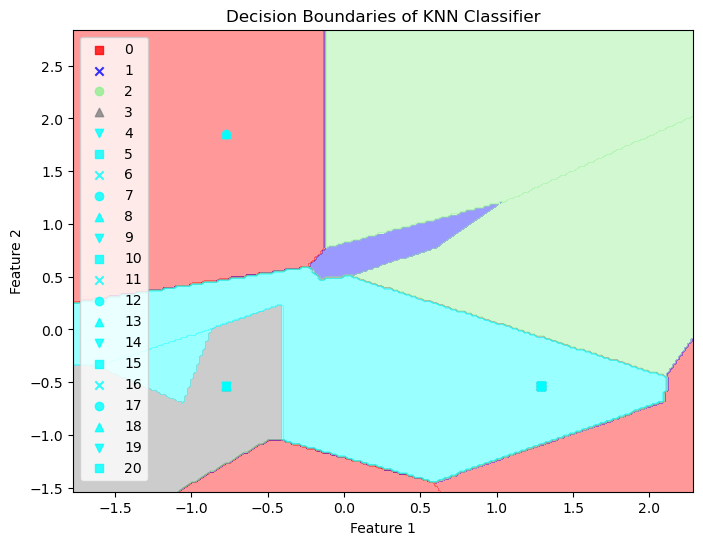

In [16]:
#Visualize the decision boundaries of the classifier.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.preprocessing import LabelEncoder

def plot_decision_boundaries(X, y, classifier, resolution=0.02):
  """Plots the decision boundaries of a classifier."""
  # Convert y to numeric values if it's not
  if not np.issubdtype(y.dtype, np.number):
    le = LabelEncoder()
    y = le.fit_transform(y)

  # Setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # Plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  # Create a mesh grid with all features used during training 
  # by replicating the mesh grid for the first two features
  num_features = classifier.n_features_in_
  if num_features > 2:
    mesh_data = np.array([xx1.ravel(), xx2.ravel()]).T
    mesh_data = np.tile(mesh_data, (1, num_features // 2))
    if num_features % 2 != 0:
      mesh_data = np.hstack((mesh_data, mesh_data[:,0].reshape(-1,1)))
  else:
    mesh_data = np.array([xx1.ravel(), xx2.ravel()]).T
  
  Z = classifier.predict(mesh_data)
  # Ensure Z is a 1D array
  Z = Z.ravel()  # Flatten the array 

  # Convert Z to numeric values if it's not
  if not np.issubdtype(Z.dtype, np.number):
    Z = le.fit_transform(Z)

  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # Plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                marker=markers[idx % len(markers)], label=cl) # Use modular arithmetic to ensure idx is within markers range

# Assuming X_test has at least 2 features
if X_test.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    plot_decision_boundaries(X_test[:, :2], y_test, best_knn)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title('Decision Boundaries of KNN Classifier')
    plt.show()
else:
  print("Visualization requires at least 2 features in the dataset.")

In [ ]:
# Interview Questions:
# 1. What are the key hyperparameters in KNN?


# Answer:

# The key hyperparameters in KNN are:

# 1. **n_neighbors (k):**  This determines the number of nearest neighbors to consider when making a prediction. A larger k value can lead to a smoother decision boundary but may also make the model less sensitive to local patterns. A smaller k value can lead to a more complex decision boundary and potentially overfitting.

# 2. **weights:** This determines how the neighbors are weighted when making a prediction.  Common options are:
#    * 'uniform': All neighbors have equal weight.
#    * 'distance': Closer neighbors have a greater influence on the prediction.

# 3. **metric:**  This defines the distance metric used to calculate the distance between data points. Common options include:
#    * 'euclidean': The straight-line distance between two points.
#    * 'manhattan': The sum of the absolute differences between the coordinates of two points.
#    * 'minkowski': A generalization of both Euclidean and Manhattan distance.

# 4. **algorithm:** This determines the algorithm used to compute the nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'. The choice of algorithm can impact performance, especially for large datasets.


# These hyperparameters influence the model's performance and should be tuned based on the specific dataset and problem. Techniques like Grid Search CV can be used to find the optimal combination of hyperparameters.



In [ ]:
#  2. What distance metrics can be used in KNN?


# Answer:

# Several distance metrics can be used in KNN, each with its own properties and suitability for different types of data. Some common distance metrics include:

# 1. **Euclidean Distance:** This is the most widely used distance metric in KNN. It calculates the straight-line distance between two points in Euclidean space. It is suitable for continuous data and when the features have similar scales.

# 2. **Manhattan Distance:** Also known as the L1 distance, it calculates the sum of the absolute differences between the coordinates of two points. It is less sensitive to outliers compared to Euclidean distance and is useful for data with different scales or when dealing with categorical features that can be represented as distances.

# 3. **Minkowski Distance:** This is a generalization of both Euclidean and Manhattan distance. It takes a parameter p that controls the power of the difference between coordinates. When p = 2, it becomes Euclidean distance, and when p = 1, it becomes Manhattan distance.

# 4. **Hamming Distance:** This is used for categorical data or binary features. It calculates the number of positions at which the corresponding elements of two strings are different. It is especially useful for text classification or comparing sequences.

# 5. **Cosine Similarity:** This measures the cosine of the angle between two vectors. It is particularly useful for text data or when the magnitude of the vectors is not important, like comparing document similarity based on word frequencies.

# The choice of distance metric depends on the nature of the data and the problem being addressed. It is important to consider the scale of the features, the presence of outliers, and the type of data (continuous, categorical, text) when selecting the appropriate distance metric. You can experiment with different metrics and evaluate their performance using cross-validation techniques to determine which one works best for your specific dataset.


